In [98]:
# adding in the additional dataset to sample from:

import pandas as pd
import numpy as np
import keras 
import glob
import matplotlib.pyplot as plt
from scipy import misc

from sklearn.model_selection import ShuffleSplit, train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import MaxPooling2D #, Convolution2D - old Keras implementation;
from keras.layers.convolutional import Conv2D
from keras import backend as K
from keras.utils import np_utils
import scipy.stats as sp


In [93]:
path = "Analysis/Data/Curb_test/*.jpg"
path2 = "Analysis/Data/noCurb/*.jpg"

counter = 0

curb_data = [] # instantiate a list to store all of these values in

curb_labels = [] # instantiate a list to store the labels of the data

for fname in glob.glob(path):
    #print(fname)
    pic = misc.imread(fname)
    #print( pic.shape, type(pic))
    #print(counter)
    curb_data.append(pic)
    counter += 1
    curb_labels.append(1)
    #plt.imshow(pic)
    #plt.show()
    
for fname in glob.glob(path2):
    
    pic = misc.imread(fname)
    curb_data.append(pic)
    counter +=1
    curb_labels.append(0)
    
    
curb_data = np.array(curb_data)   
curb_labels = np.array(curb_labels)


    
    

In [94]:
print(curb_data.shape)

print(curb_labels.shape)
print(np.amax(curb_labels))
print(np.amin(curb_labels))
print(curb_labels.size)
# remember: record count, rows, columns, color dim, classification

(479, 100, 100, 3)
(479,)
1
0
479


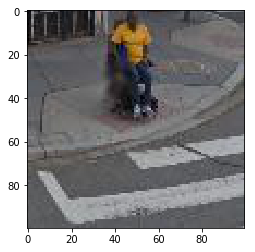

In [96]:
# test image integrity 
plt.imshow(curb_data[0])
plt.show()

In [111]:
# Create training and test split arrays:

# just do an 80/20 test/train split for the time being, then can go do better cross validation later:

X_train, X_test, y_train, y_test = train_test_split(curb_data, curb_labels, test_size = 0.2, random_state = 100)

# check to make sure it everything went smoothly:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(383, 100, 100, 3)
(96, 100, 100, 3)
(383,)
(96,)


In [112]:
# are we getting the correct values? :
print(X_train.min())
print(X_train.max())
print(X_train.dtype) # need to change the data type

# looks good

0
255
uint8


In [114]:
# change the datatype to float:

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [115]:
# normalize the data to a value of 1:
X_train /= 255
X_test /= 255

In [118]:
# just a boolean array:
y_train[:10]

array([1, 1, 0, 1, 1, 1, 0, 1, 1, 0])

In [120]:
# not sure that this is necessary? :
y_train = np_utils.to_categorical(y_train,2)
y_test = np_utils.to_categorical(y_test, 2)

In [122]:
print(y_train.shape)
print(y_test.shape)

(383, 2)
(96, 2)


In [132]:
# now create the layers of the neural network:

model = Sequential()

In [133]:
model.add(Conv2D(32,kernel_size = (3,3), activation = 'relu', input_shape = (100, 100, 3)))

In [134]:
print( model.output_shape)

(None, 98, 98, 32)


In [135]:
model.add(Conv2D(32,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

In [136]:
# Now, let's connect the Dense layers: fully connected dense layers
model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation = 'softmax'))

In [137]:
# compile the model - define the loss function and optimizer:

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam',metrics =['accuracy'])

In [138]:
model.fit(X_train, y_train, batch_size = 32, nb_epoch = 10, verbose = 1)

C:\Program Files\Anaconda3\lib\site-packages\keras\models.py:844: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/10
383/383 [==============================] - 7s - loss: 1.5292 - acc: 0.5431     
Epoch 2/10
383/383 [==============================] - 6s - loss: 0.6447 - acc: 0.6031     
Epoch 3/10
383/383 [==============================] - 6s - loss: 0.5252 - acc: 0.7467     
Epoch 4/10
383/383 [==============================] - 6s - loss: 0.4447 - acc: 0.7911     
Epoch 5/10
383/383 [==============================] - 6s - loss: 0.3728 - acc: 0.8068     
Epoch 6/10
383/383 [==============================] - 6s - loss: 0.2882 - acc: 0.8903     
Epoch 7/10
383/383 [==============================] - 6s - loss: 0.2719 - acc: 0.8930     
Epoch 8/10
383/383 [==============================] - 6s - loss: 0.1905 - acc: 0.9347     
Epoch 9/10
383/383 [==============================] - 6s - loss: 0.1234 - acc: 0.9556     
Epoch 10/10
383/383 [==============================] - 6s - loss: 0.0596 - acc: 0.9896     


In [139]:
score = model.evaluate(X_test, y_test, verbose = 0)
print( 'With a loss of', '%.4f' % score[0], 'we got an accuracy of: ', '%.4f' % score[1] )

With a loss of 0.8606 we got an accuracy of:  0.7396
